In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Converting thius DataFrame into NumPy array
train_data = np.array(train_data)
m, n = train_data.shape

print(train_data.shape)

(42000, 785)


In [9]:
X_train = train_data[:, 1:n]
print('X_train.shape: ', X_train.shape)
y_train = train_data[:, 0]
print('y_train.shape: ', y_train.shape)

X_train.shape:  (42000, 784)
y_train.shape:  (42000,)


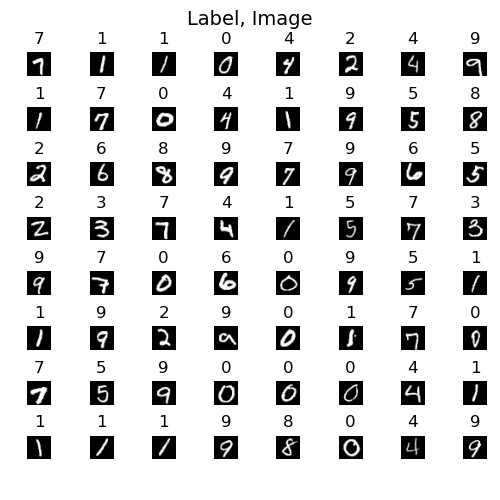

In [11]:
#Visualizing the data using random 64 training examples
m,n = X_train.shape
fig, axes = plt.subplots(8, 8, figsize = (5,5))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_reshaped = X_train[random_index].reshape((28,28))
    ax.imshow(X_reshaped, cmap = 'gray')
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, Image", fontsize=14)

Neural Network Model Architecture:
1. Input Layer of array = 42000 x 784
2. Hidden Layer 1: relu activation; 25 units; W1.shape = (42000, 25); b1.shape = (25,)
3. Hidden Layer 2: relu activation; 15 units; W2.shape = (25, 15); b2.shape = (15,)
4. Output Layer : linear activation; 10 units; W3.shape = (15, 10); b3.shape = (10,)

In [14]:
#Creating the NN model
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(25, activation = 'relu', name = 'L1'),
        tf.keras.layers.Dense(15, activation = 'relu', name = 'L2'),
        tf.keras.layers.Dense(10, activation = 'linear', name = 'L3'),
    ],
    name = "my_model"
)

In [16]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True))

In [18]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
[layer1, layer2, layer3] = model.layers

In [22]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print("W1.shape: ", W1.shape)
print("W2.shape: ", W2.shape)
print("W3.shape: ", W3.shape)
print("b1.shape: ", b1.shape)
print("b2.shape: ", b2.shape)
print("b3.shape: ", b3.shape)

W1.shape:  (784, 25)
W2.shape:  (25, 15)
W3.shape:  (15, 10)
b1.shape:  (25,)
b2.shape:  (15,)
b3.shape:  (10,)


In [24]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
)

In [26]:
history = model.fit(
    X_train, y_train,
    epochs = 40
)

Epoch 1/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.8308
Epoch 2/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3861
Epoch 3/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1821
Epoch 4/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0219
Epoch 5/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8696
Epoch 6/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5758
Epoch 7/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3868
Epoch 8/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3294
Epoch 9/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2860
Epoch 10/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2554
Epoch 11/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2327
Epoch 12/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2237
Epoch 13/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2049
Epoch 14/40
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2017
Epoch 15/40
1313/1313 ━━━━━━━

In [28]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

In [30]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

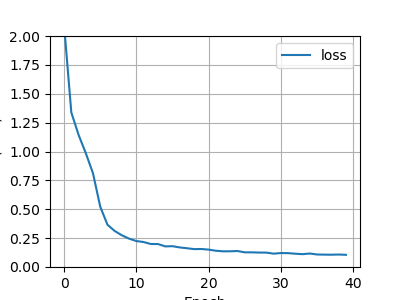

In [32]:
plot_loss_tf(history)

In [34]:
def pred(X):
    X = np.expand_dims(X, axis = 0)
    prediction = model.predict(X)
    return prediction

In [36]:
test_data = pd.read_csv('test.csv')
X_test = np.array(test_data)
X_test.shape

(28000, 784)

In [38]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━

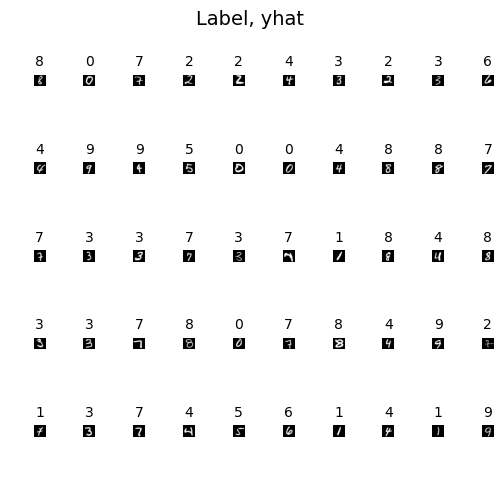

In [40]:
m, n = X_test.shape
fig, axes = plt.subplots(5,10, figsize = (5,5))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.91])
widgvis(fig)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X_test[random_index].reshape((28,28))
    ax.imshow(X_random_reshaped, cmap = 'gray')
    prediction = model.predict(X_test[random_index].reshape(1, 784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f"{yhat}", fontsize = 10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize = 14)
plt.show()